In [41]:
!sudo apt update
!sudo apt install -y software-properties-common
!sudo add-apt-repository -y ppa:deadsnakes/ppa
!sudo apt install -y python3.13  # или python3.13, если доступно

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libpython3.13-stdlib
Suggested packages:
  python3.13-venv
The following NEW packages will be installed:
  libpython3.13-stdlib python3.13
0 upgraded, 2 newly installed, 0 to remove and 35 not upgraded.
Need to get 5,493 kB of archives.
After this operation, 21.5 MB of additional disk space will be used.
Get:1 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 libpython3.13-stdlib amd64 3.13.3-1+jammy1 [2,979 kB]
Get:2 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy/main amd64 python3.13 amd64 3.13.3-1+jammy1 [2,513 kB]
Fetched 5,493 kB in 2s (2,274 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 2.)
debconf: falling back to frontend: Rea

In [43]:
!curl -sS https://bootstrap.pypa.io/get-pip.py | python3.13

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 10.7 MB/s eta 0:00:00


In [44]:
!pip3 install /content/mlgrad-0.7.1-cp313-cp313-linux_x86_64.whl

Processing ./mlgrad-0.7.1-cp313-cp313-linux_x86_64.whl
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [mlgrad]


In [192]:
import mlgrad.loss as loss
import mlgrad.funcs as funcs
import mlgrad.models as models
import mlgrad.risks as risks
import mlgrad.gd as gd
import mlgrad.inventory as inventory
from sklearn.metrics import mean_absolute_error

In [72]:
data = pd.read_csv("/content/gesell.csv", sep=',')
data.head()

,age,score
0,15,95
1,26,71
2,10,83
3,9,91
4,15,102


In [105]:
X = np.log(data['age'].values.astype("d"))
Y = np.log(data['score'].values.astype("d"))
Xs = X.reshape(-1,1)

X

array([2.708, 3.258, 2.303, 2.197, 2.708, 2.996, 2.890, 2.398, 2.079,
       2.996, 1.946, 2.197, 2.303, 2.398, 2.398, 2.303, 2.485, 3.738,
       2.833, 2.398, 2.303])

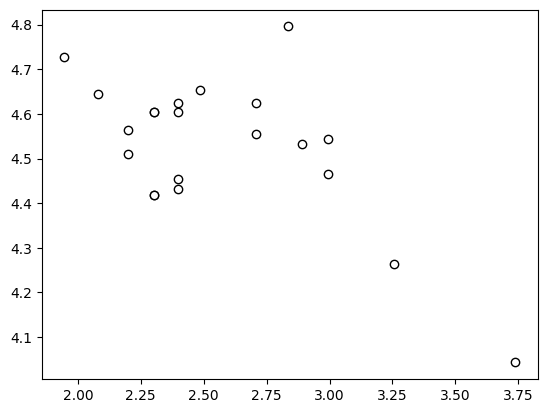

In [74]:
plt.scatter(X, Y, c="w", edgecolors="k")
plt.show()

In [186]:
def test_h(h: float):

  mod_ls = models.LinearModel(1)
  regr_ls = regr.regression(X[:,None], Y, mod_ls, h=h)

  plt.scatter(X, Y, c="w", edgecolors="k")

  predict = []
  for x in X:
    predict.append(mod_ls.evaluate([x]))

  print('mae = ', mean_absolute_error(list(Y), predict)*100)

  plt.plot(X, predict)
  plt.show()

mae =  10.042760409912368


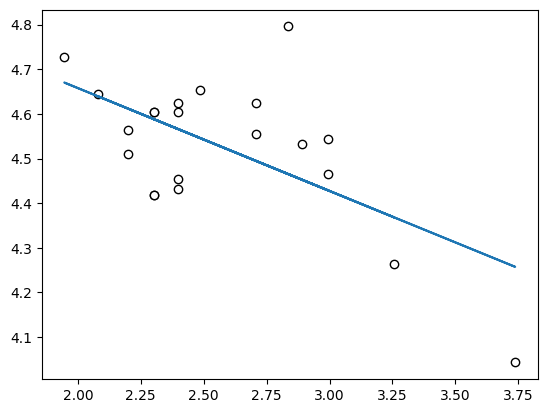

In [187]:
test_h(h=0.1)

mae =  10.040732851481653


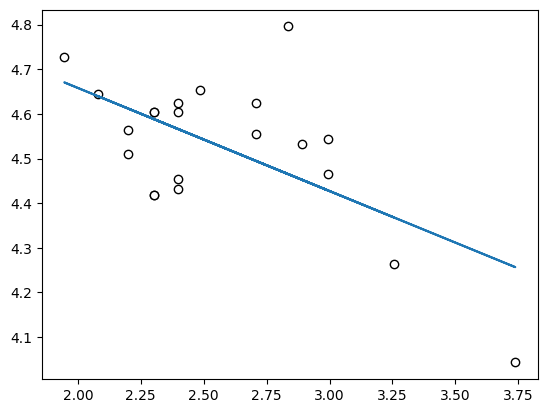

In [188]:
test_h(h=0.5)

mae =  10.041118173974157


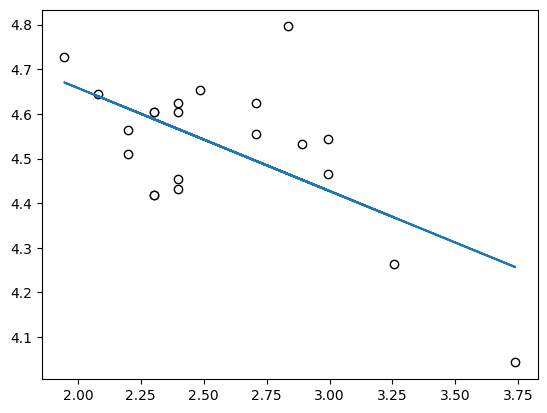

In [189]:
test_h(h=1)

mae =  10.037350350790904


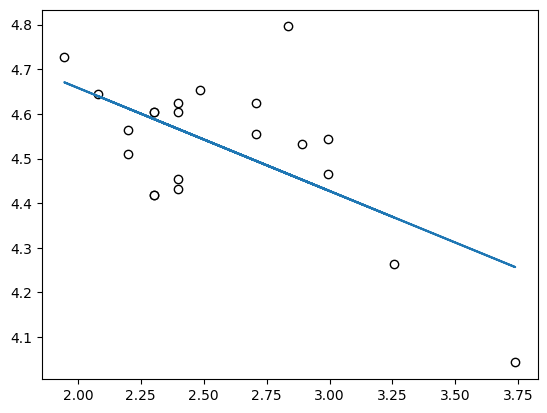

In [190]:
test_h(h=2)

mae =  10.036998001702061


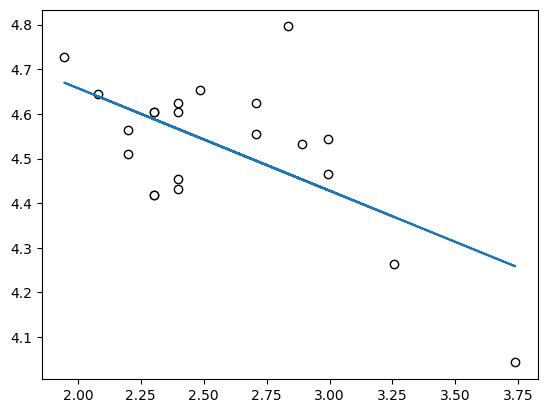

In [193]:
test_h(h=3)

mae =  10.040597808272981


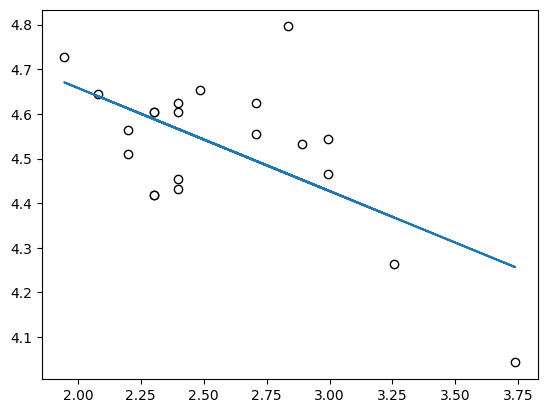

In [194]:
test_h(h=4)

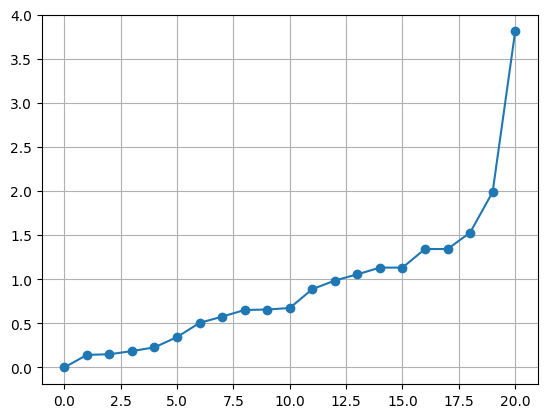

In [130]:
E = abs(predict - Y)
Z = inventory.modified_zscore(E)
plt.plot(sorted(abs(Z)), marker='o')
plt.grid(1)
plt.show()

In [133]:
# Уберем один выброс
X1 = X[abs(Z) < 3.5]
Y1 = Y[abs(Z) < 3.5]

In [134]:
mod_ls1 = models.LinearModel(1)
regr_ls1 = regr.regression(X1[:,None], Y1, mod_ls1, h=0.1)
print(np.asarray(mod_ls1.param))

[ 5.157 -0.252]


In [151]:
predict_ls = []
predict_ls1 = []

for x in X1:
  predict_ls.append(mod_ls.evaluate([x]))
  predict_ls1.append(mod_ls1.evaluate([x]))

In [150]:
predict_ls1 = []

for x in X1:
  predict_ls1.append(mod_ls1.evaluate([x]))

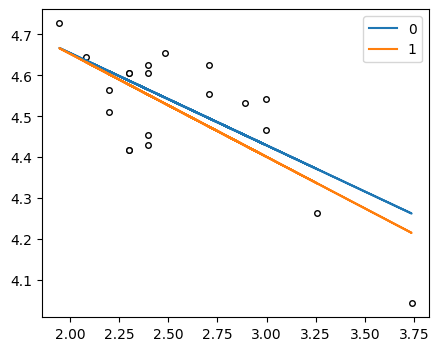

In [153]:
plt.figure(figsize=(5,4))
plt.scatter(X1, Y1, s=16, c='w', edgecolors='k')

plt.plot(X1, predict_ls, label='0')
plt.plot(X1, predict_ls1, label='1')

plt.legend()
plt.show()

In [191]:
print('0 = ', mean_absolute_error(list(Y1), predict_ls)*100)
print('1 = ', mean_absolute_error(list(Y1), predict_ls1)*100)

0 =  8.918366977088766
1 =  9.145108613528526


Вывод:

*   График под номером 0 - идеальный вариант (Mae - минимальна)
*   При h = 3, ошибка минимальна



# Запуск кода из документации (ошибки)

**Рисунок №1**

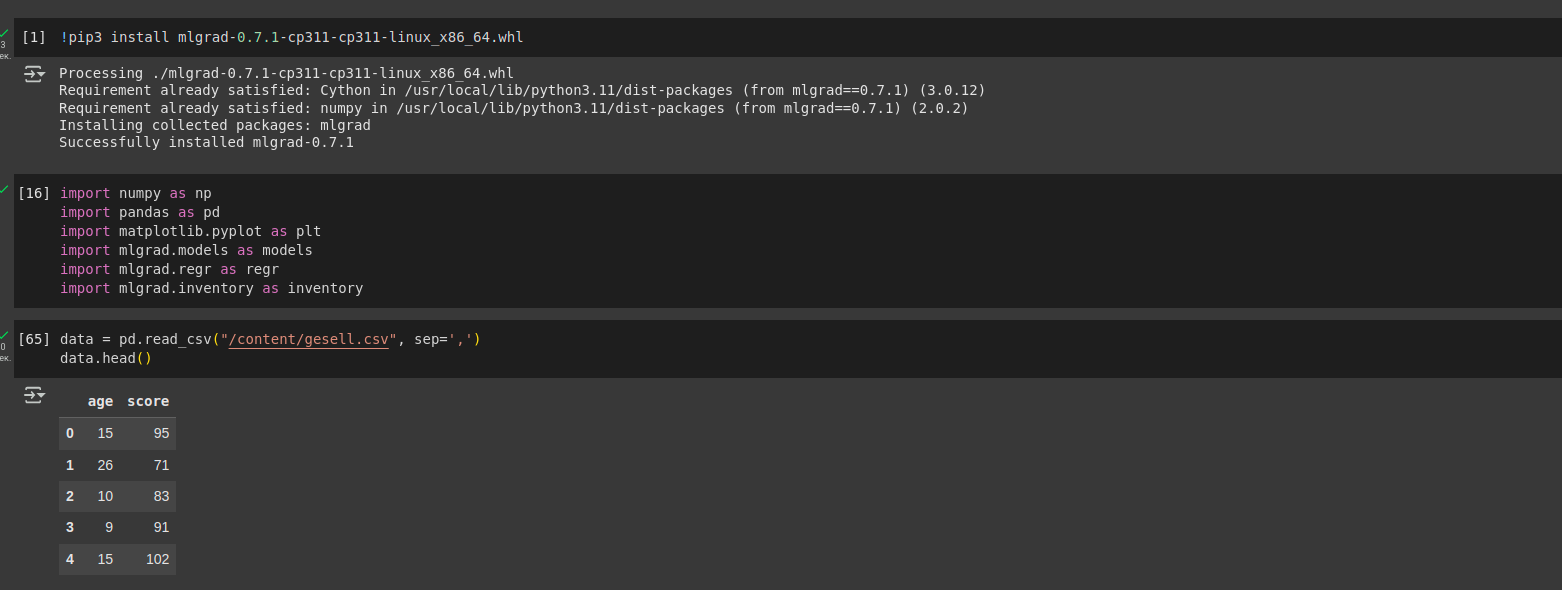

**Рисунок №2**

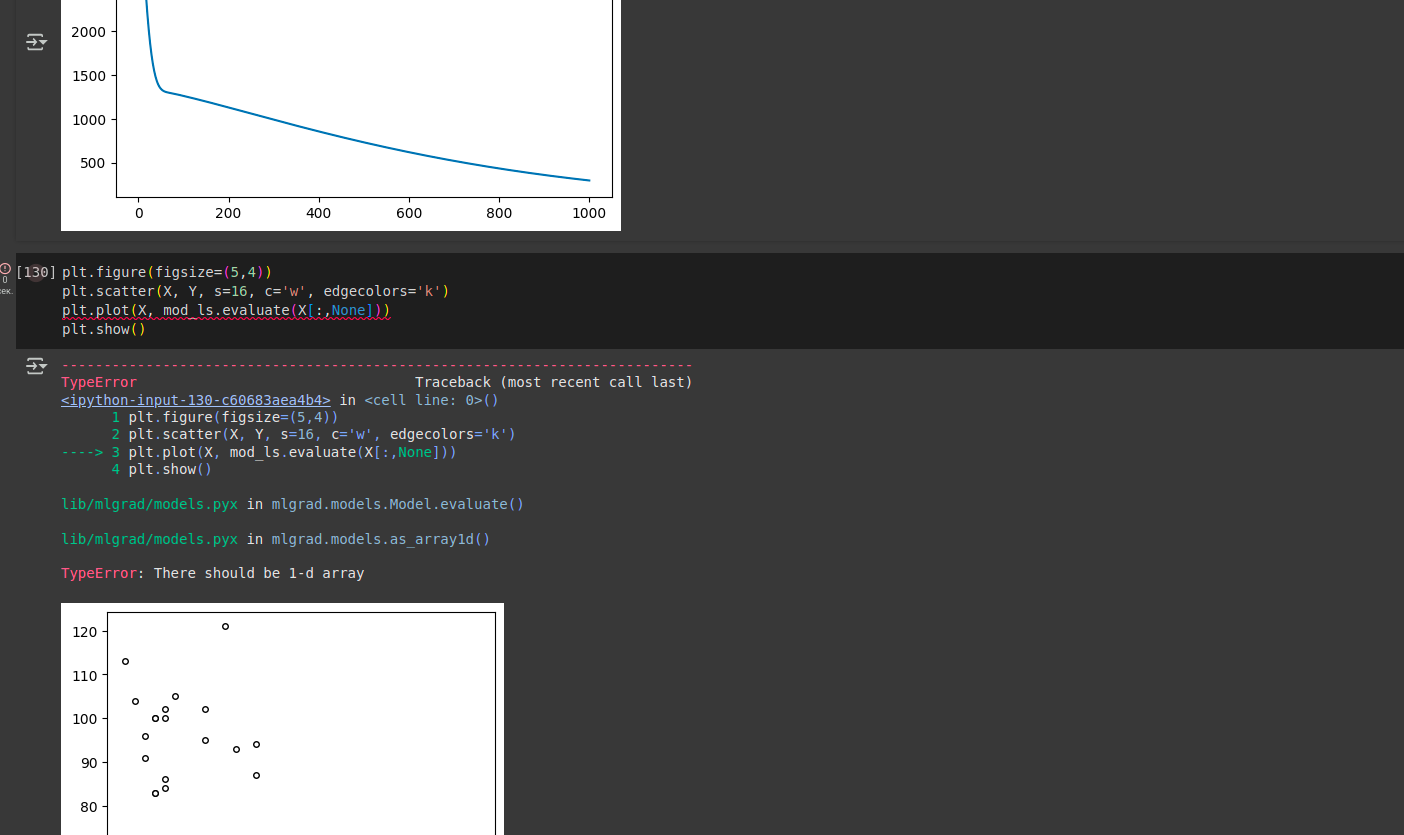

**Рисунок №3**

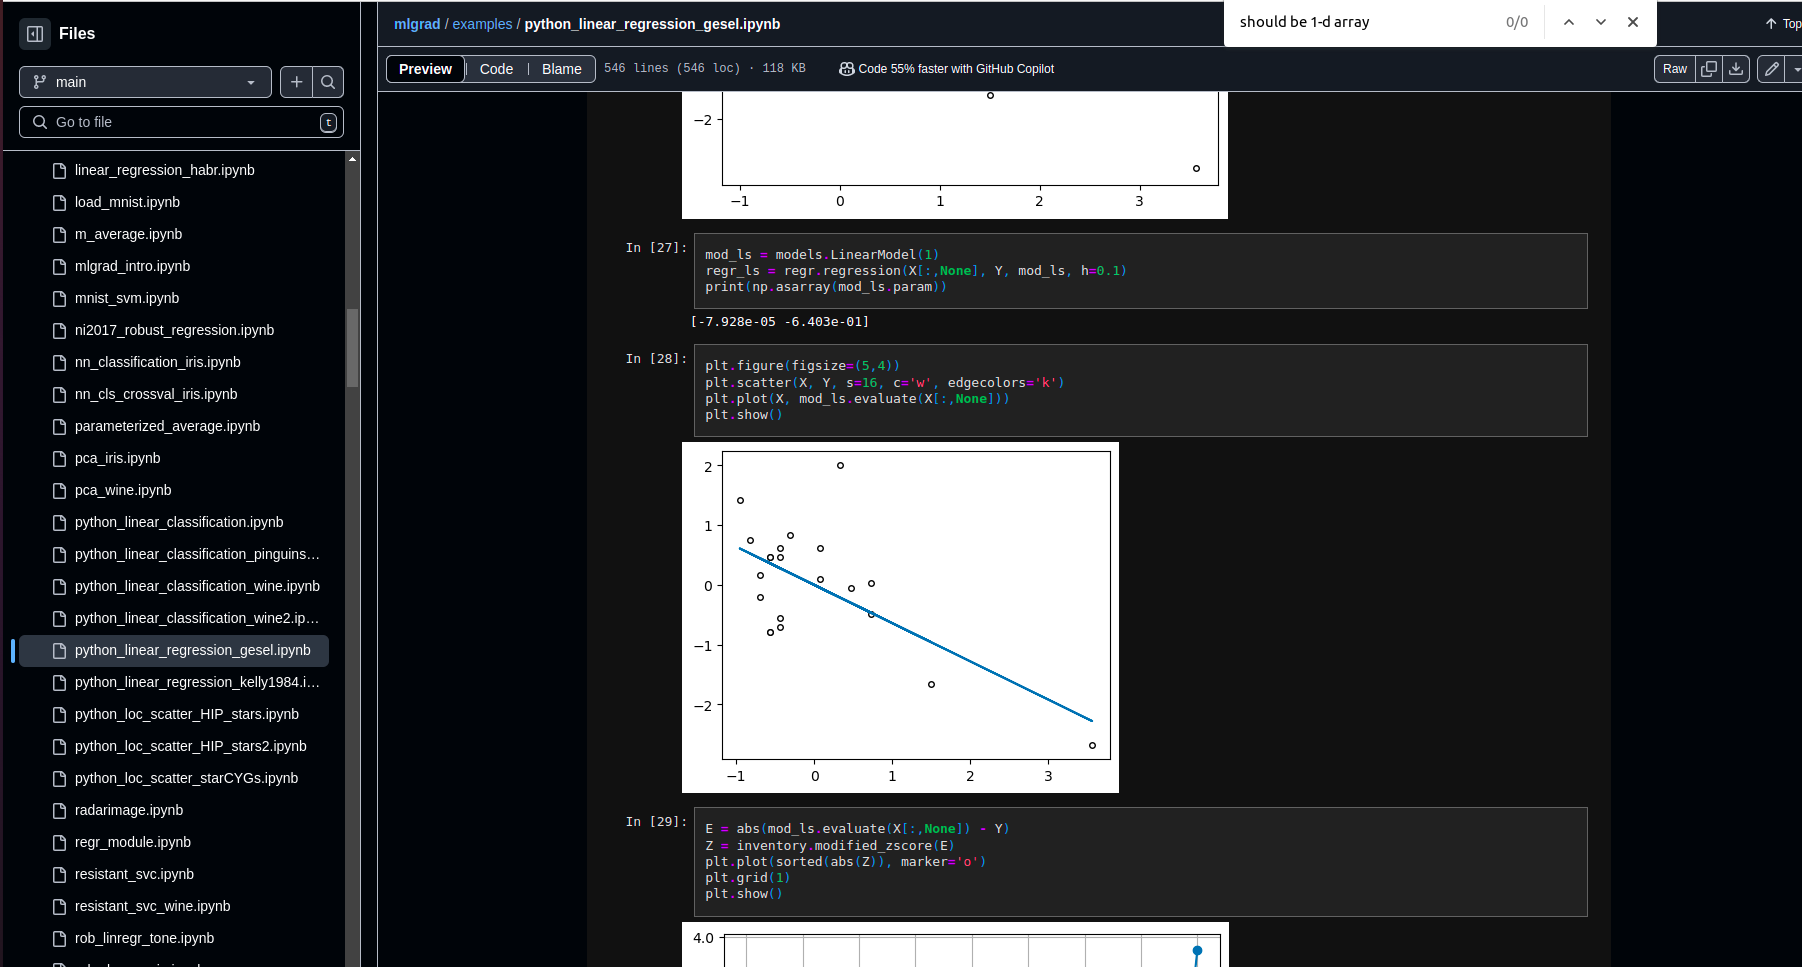